<h1 style="font-size:3rem;color:#A3623B;">Lab 2</h1>

## Security and Ethical aspects of data

### Amaya Nogales Gómez


## 2.1 Support Vector Machines


In [1]:
# we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt  # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal  # for generating synthetic data
from sklearn import datasets  # For real datasets
SEED = 1122334455
seed(SEED)  # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)


In [2]:
# We load the real dataset from Lab 1: iris
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names)  # variables, features
print(iris.target_names)  # classes
# print(iris)


(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
# print(X)

y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)


100


In [4]:
# Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.svm import SVC


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='#FFAAAA', alpha=.5)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


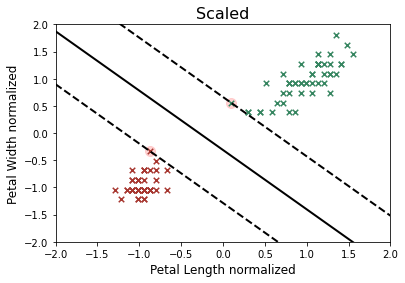

In [6]:
# SVM Classifier model
# the hyperparameter C control the margin violations
# smaller C leads to more margin violations but wider margin

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1],
            color='#378661', marker='x', s=30, linewidth=1.5, label="Class +1")
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1],
            color='#A73730', marker='x', s=30, linewidth=1.5, label="Class -1")


plt.xlabel("Petal Length normalized", fontsize=12)
plt.ylabel("Petal Width normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()


### Questions:

1-Obtain and plot the SVM classifier for the dataset from Lab 1, Part 1.1. (X_syn, y_syn).\
See below


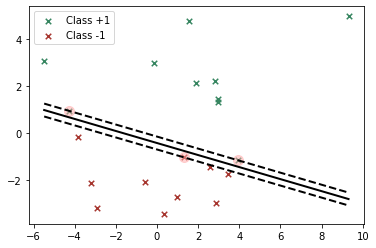

In [7]:
# Question 1

def generate_synthetic_data(
    n_samples1=10,  # generate these many data points for class1
    n_samples2=10,  # generate these many data points for class2
    mu1=[2, 2],
    sigma1=[[5, 1], [1, 5]],
    mu2=[-2, -2],
    sigma2=[[10, 1], [1, 3]]
):
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.

    """

    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean=mean_in, cov=cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv, X, y

    """ Generate the features randomly """
    # For the NON-protected group (men)
    # We will generate one gaussian cluster for each class

    nv1, X1, y1 = gen_gaussian(
        int(n_samples1), mu1, sigma1, 1)  # positive class
    nv2, X2, y2 = gen_gaussian(
        int(n_samples2), mu2, sigma2, 0)  # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    # shuffle the data
    perm = list(range(0, n_samples1 + n_samples2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]

    return X, y


X_syn, y_syn = generate_synthetic_data()

plt.scatter(X_syn[y_syn == 1][:, 0], X_syn[y_syn == 1][:, 1],
            color='#378661', marker='x', s=30, linewidth=1.5, label="Class +1")
plt.scatter(X_syn[y_syn == 0][:, 0], X_syn[y_syn == 0][:, 1],
            color='#A73730', marker='x', s=30, linewidth=1.5, label="Class -1")
plt.legend(loc=2, fontsize=10)
svm_clf = SVC(kernel="linear", C=999)
svm_clf.fit(X_syn, y_syn)

plot_svc_decision_boundary(svm_clf, np.min(X_syn), np.max(X_syn))
plt.show()


2-Which differences do you observe from the SVM classifier for the iris dataset?\
Sometimes, the algorithm doesn't stop running, which is probably because the two classes are not linearly separable, therefore it keeps trying to separate them with a line, which is impossible.

3-How can you make it more "similar" to the iris classifier? Plot different SVM classifiers.\
By using soft-margin, in order to allow for some data points to be "misclassified". The kernel trick can also be used, but it has not been seen in class.

4-Load another real dataset from sklearn library, obtain the SVM classifier and plot both. Note: select only 2 features to be in dimension 2 as we did with the iris dataset.\
See below


=====

C = 1


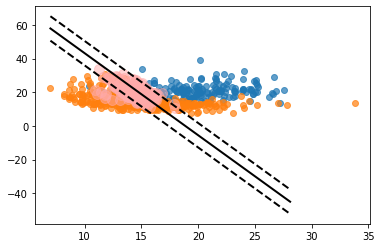

=====

C = 10


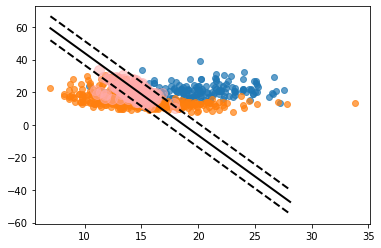

=====

C = 100


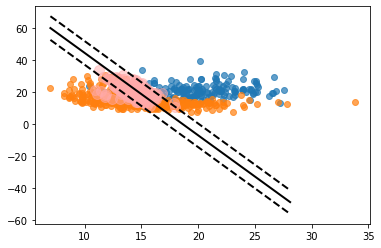

=====

C = 1000


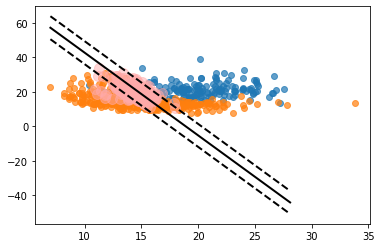

=====

C = 10000


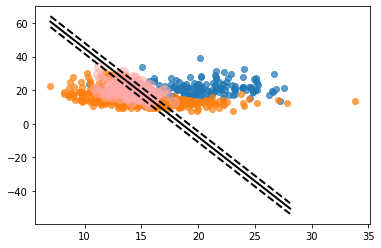

=====

C = 100000


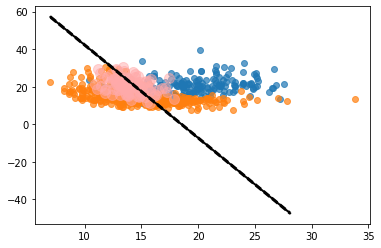

=====

C = 1000000


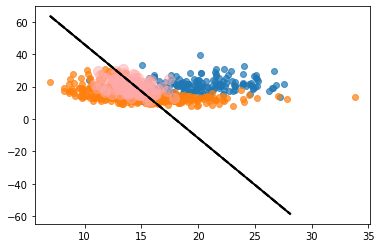

In [8]:
# Question 4
import pandas as pd

def preproc_cancer():
    # Load data
    cancer = datasets.load_breast_cancer()
    # select columns
    red_cancer = pd.DataFrame(cancer.data[:, [0, 1]]).copy()
    red_cancer.rename(columns=dict(
        zip(red_cancer.columns, cancer.feature_names[0:2])), inplace=True)
    red_cancer["target"] = cancer.target
    return red_cancer

def svm_classify(C, red_cancer):
    # format to feed clf
    X_data = red_cancer[["mean radius", "mean texture"]].values
    y_data = red_cancer["target"].values
    svm_clf = SVC(kernel="linear", C=C)
    svm_clf.fit(X_data, y_data)
    return svm_clf

def plot_red_cancer(red_cancer, svm_clf):
    X_data = red_cancer[["mean radius", "mean texture"]].values
    # plot
    x, y = red_cancer[red_cancer["target"] == 0][[
        "mean radius", "mean texture"]].values.reshape(2, -1)
    plt.scatter(x, y, alpha=.7)
    x, y = red_cancer[red_cancer["target"] == 1][[
        "mean radius", "mean texture"]].values.reshape(2, -1)
    plt.scatter(x, y, alpha=.7)
    plot_svc_decision_boundary(svm_clf, np.min(X_data[:,0]), np.max(X_data[:,0]))
    plt.show()

red_cancer = preproc_cancer()
C_values = [10**k for k in range(7)]
C_accuracies = []
for c in C_values:
    print(f"=====\n\nC = {c}")
    svm_clf = svm_classify(C=c, red_cancer=red_cancer)
    plot_red_cancer(red_cancer, svm_clf)

    X_data = red_cancer[["mean radius", "mean texture"]].values
    y_data = red_cancer["target"].values
    C_accuracies.append(svm_clf.score(X_data, y_data))


5-Provide a table with accuracy results for all the classifiers above.\
See below

,C,accuracy
0,1,0.889279
1,10,0.891037
2,100,0.891037
3,1000,0.889279
4,10000,0.891037
5,100000,0.898067
6,1000000,0.898067


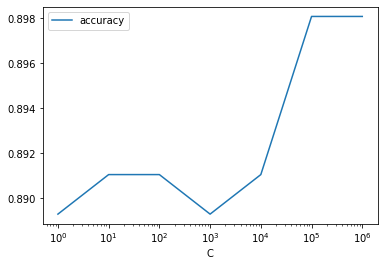

In [9]:
df_acc = pd.DataFrame(data={"C":C_values, "accuracy":C_accuracies})
df_acc.plot("C", "accuracy", logx=True)
df_acc

## 2.2 Generating Biased data

Now you are going to generate a toy example of synthetic biased data. You will reproduce the Representation bias and Aggregation bias defined in Lecture 2.

As a reminder:

Representation bias occurs when certain parts of the input space are underrepresented.

Aggregation bias arises when a one-size-fit-all model is used for groups with different conditional distributions.

In order to create these two type of bias, we can "play" with the probability of an object $i$ of being protected, and the parameters of the distribution (Gaussian in our example) these protected objects follow.

In the following, you will obtain a dataset with aggregation bias.


In [10]:
def generate_synthetic_data_bias(
    n_samples = 50,  # generate these many data points per class
    # For biased data
    # this parameter sets the probability of being protected (sensitive feature=1)
    p_sen = 0.5,
    # This is the increment of the mean for the positive class
    delta1 = [3, -2],
    # This is the increment of the mean for the negative class
    delta2 = [3, -2]):
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.

    """


    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean=mean_in, cov=cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv, X, y, x_sen

    """ Generate the features randomly """
    # For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2, -2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1 = gen_gaussian_sensitive(
        int((1-p_sen)*n_samples), mu1, sigma1, 1, 0)  # positive class
    nv2, X2, y2, x_sen2 = gen_gaussian_sensitive(
        int((1-p_sen)*n_samples), mu2, sigma2, 0, 0)  # negative class

    # For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1, delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2, delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(
        int(p_sen*n_samples), mu3, sigma3, 1, 1.)  # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(
        int(p_sen*n_samples), mu4, sigma4, 0, 1.)  # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot = np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))

    # shuffle the data
    perm = list(range(0, n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot = x_prot[perm]

    return X, y, x_prot
    
# print(X_syn)
# print(y_syn)
# print(x_bias)

def plot_agg_bias(X_syn, y_syn, x_bias):
    plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=40, linewidth=1.5, label= "Class +1")
    plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=40, linewidth=1.5, label = "Class -1")
    plt.show()
    X_s_0 = X_syn[x_bias == 0.0]
    X_s_1 = X_syn[x_bias == 1.0]
    y_s_0 = y_syn[x_bias == 0.0]
    y_s_1 = y_syn[x_bias == 1.0]

    plt.scatter(X_s_0[y_s_0 == 1][:, 0], X_s_0[y_s_0 == 1][:, 1],
                color='green', marker='x', s=40, linewidth=1.5, label="Non-prot. +1")
    plt.scatter(X_s_0[y_s_0 == 0][:, 0], X_s_0[y_s_0 == 0][:, 1],
                color='red', marker='x', s=40, linewidth=1.5, label="Non-prot. -1")
    plt.scatter(X_s_1[y_s_1 == 1][:, 0], X_s_1[y_s_1 == 1][:, 1],
                color='green', marker='o', facecolors='none', s=40, label="Prot. +1")
    plt.scatter(X_s_1[y_s_1 == 0][:, 0], X_s_1[y_s_1 == 0][:, 1],
                color='red', marker='o', facecolors='none', s=40, label="Prot. -1")
    plt.legend(loc=2, fontsize=10)

    plt.show()


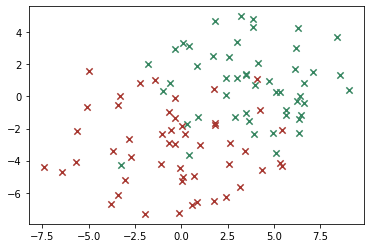

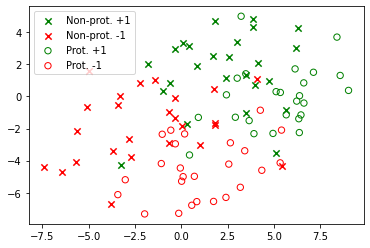

In [11]:
X_syn, y_syn, x_bias = generate_synthetic_data_bias()
plot_agg_bias(X_syn, y_syn, x_bias)

### Questions:

1-Create and plot a dataset with an aggregation bias (much) stronger than in the previous dataset.\
See below

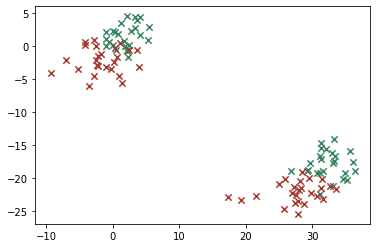

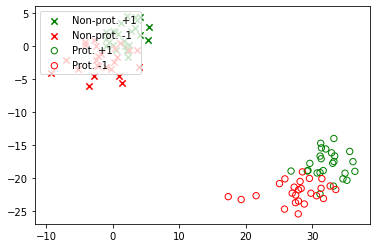

In [12]:
X_syn, y_syn, x_bias = generate_synthetic_data_bias(delta1 = [30, -20], delta2 = [30, -20])
plot_agg_bias(X_syn, y_syn, x_bias)


2-Do you think the SVM classifier will perform with the same accuracy for the protected and non-protected groups? Why?\
No, because in the general case the protected group is less represented.

3-Create a dataset with representation bias (hint: you can only change p_sen and/or delta1 and/or delta2).\
Keeping `delta1` and `delta2` from the previous example, we modify `p_sen` to have the sensitive group being (drastically) underrepresented. See below.

In [13]:
X_syn, y_syn, x_bias = generate_synthetic_data_bias(p_sen=.1, delta1 = [30, -20], delta2 = [30, -20])
print(X_syn, y_syn, x_bias)

[[ 3.46840798e+00 -1.45479148e+00]
 [ 1.81837569e-01 -4.19677924e+00]
 [ 3.16028674e+01 -1.81950413e+01]
 [ 6.88319173e-01  2.29088202e+00]
 [-1.67226205e+00 -3.07286832e+00]
 [-2.00770139e-01 -2.49792571e+00]
 [-8.61924833e+00 -2.04853480e+00]
 [ 4.11286922e-02 -2.13911932e+00]
 [-4.04626447e+00 -2.58336038e+00]
 [ 4.12594934e+00 -2.42587008e+00]
 [ 3.37114671e+01 -1.73270864e+01]
 [-7.05244245e-01 -3.59463666e+00]
 [-2.96602957e+00 -5.01680228e+00]
 [ 3.10093428e+01 -1.91562460e+01]
 [-4.30316043e+00 -3.79092466e+00]
 [-1.65896910e-01 -1.85324448e+00]
 [-4.00751227e-01 -3.89082854e+00]
 [ 2.88765976e-01  1.45899455e+00]
 [ 3.73171093e+00 -1.25620537e+00]
 [-4.75258206e-01 -1.94823407e+00]
 [ 2.98276825e+01 -1.94236044e+01]
 [ 4.78850342e-01 -1.67595647e+00]
 [ 3.08164782e+00 -1.45102923e+00]
 [ 2.29636416e-01 -3.03589658e+00]
 [ 2.35138169e+00 -8.98613441e-01]
 [ 4.43703638e+00  2.52959768e+00]
 [ 3.72997302e+00  5.28700882e+00]
 [ 3.73574043e+00  3.96814688e-01]
 [-6.69386185e+00 -2


4-Find the SVM classifier for the 3 datasets: the one provided, the one from question 1 and the other one from question 3. (Answer: the coefficients (w,b) defining the classifier for each case).

5\*-Provide a table reporting accuracy for the 3 cases from question 3.

6\*-Plot the datasets and classifiers from question 3.

**Grouped answer for questions 4, 5 and 6:**

In [14]:
def svm_classify_bias(C, X_syn, y_syn):
    svm_clf = SVC(kernel="linear", C=C)
    svm_clf.fit(X_syn, y_syn)
    return svm_clf

def plot_agg_bias(X_syn, y_syn, x_bias, svm_clf):
    plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=40, linewidth=1.5, label= "Class +1")
    plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=40, linewidth=1.5, label = "Class -1")
    plot_svc_decision_boundary(svm_clf, np.min(X_syn[:,0]), np.max(X_syn[:,0]))
    plt.show()
    X_s_0 = X_syn[x_bias == 0.0]
    X_s_1 = X_syn[x_bias == 1.0]
    y_s_0 = y_syn[x_bias == 0.0]
    y_s_1 = y_syn[x_bias == 1.0]

    plt.scatter(X_s_0[y_s_0 == 1][:, 0], X_s_0[y_s_0 == 1][:, 1],
                color='green', marker='x', s=40, linewidth=1.5, label="Non-prot. +1")
    plt.scatter(X_s_0[y_s_0 == 0][:, 0], X_s_0[y_s_0 == 0][:, 1],
                color='red', marker='x', s=40, linewidth=1.5, label="Non-prot. -1")
    plt.scatter(X_s_1[y_s_1 == 1][:, 0], X_s_1[y_s_1 == 1][:, 1],
                color='green', marker='o', facecolors='none', s=40, label="Prot. +1")
    plt.scatter(X_s_1[y_s_1 == 0][:, 0], X_s_1[y_s_1 == 0][:, 1],
                color='red', marker='o', facecolors='none', s=40, label="Prot. -1")
    plt.legend(loc=2, fontsize=10)
    plot_svc_decision_boundary(svm_clf, np.min(X_syn[:,0]), np.max(X_syn[:,0]))
    plt.show()


------ Dataset 1 ------


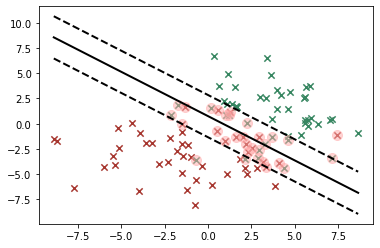

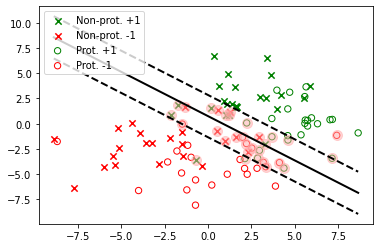

w = 	 [0.41882796 0.47811098]
b = 	 -0.3604573943736538
Accuracy: 	 0.89

------ Dataset 2 ------


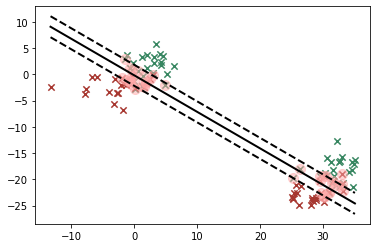

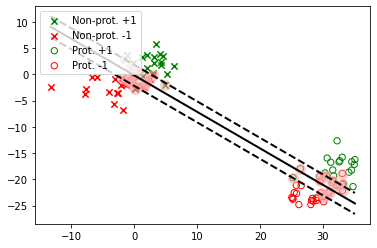

w = 	 [0.34772531 0.500123  ]
b = 	 0.09916046482153966
Accuracy: 	 0.84

------ Dataset 3 ------


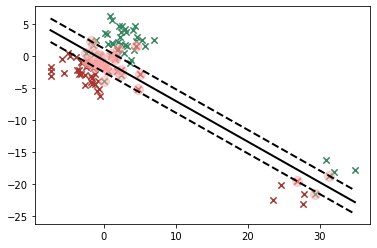

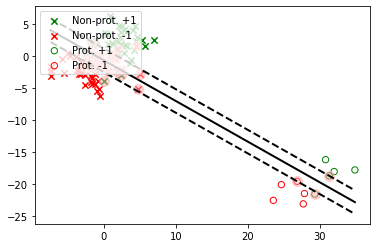

w = 	 [0.34524578 0.54311426]
b = 	 0.36331937621930194
Accuracy: 	 0.88


In [15]:
def answer_dataset(i, p_sen = 0.5, delta1 = [3, -2], delta2 = [3, -2]):
    print(f"\n------ Dataset {i} ------")
    X_syn, y_syn, x_bias = generate_synthetic_data_bias(p_sen=p_sen, delta1=delta1, delta2=delta2)
    svm_clf = svm_classify_bias(500, X_syn, y_syn)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    plot_agg_bias(X_syn, y_syn, x_bias, svm_clf)
    print(f"w = \t {w}")
    print(f"b = \t {b}")
    print(f"Accuracy: \t {svm_clf.score(X_syn, y_syn)}")

# Dataset 1
answer_dataset(i=1)
# Dataset 2
answer_dataset(i=2, delta1 = [30, -20], delta2 = [30, -20])
# Dataset 3
answer_dataset(i=3, p_sen=.1, delta1 = [30, -20], delta2 = [30, -20])